# ISM's (07th Oct 2020)

#  Query the SupportPrim CBR system - real patients

In [68]:
# To enable the autocomplete feature based upon clicking the TAB button
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
import random

sns.set()

In [70]:
import requests
import json

In [71]:
pd.options.display.max_columns = 100

### Constants for this script

In [72]:
multi_val_separator = ';'

### Constants for myCBR rest APIs

In [73]:
param_base_url      = 'http://supportprim.idi.ntnu.no:8081'
 
headers             = 'application/json'

default_concept_name  = 'patient'
default_casebase_name = 'cb_all'
default_cases_limit   = -1 
 
param_cb            = 'casebase='
param_cb_name       = 'casebaseName='
param_concept       = '&concept%20name='
param_case_id       = '&caseID='
param_k             = '&k='
retrieve_all        = '&k=-1'

In [74]:
ID            = 'id'
DEFAULT_INDEX = 'id'
UNKNOWN       = '_unknown_'
CASE_ID       = 'caseID'
sim_label     = 'similarity'

## Constants with respect to dataset

In [75]:
concept       = 'patient'
target_label  = 'out01'

### Define the columns for the dataframe

In [76]:
column_list = [

 'id',
 'caseID',
 'patient_id', 
 'similarity',
    
 'activity_1', 
 'age_1', 
 
 'bmi_1', 
 'body_main_1', 
 'como_count_1', 
 
 'education_1', 
 'employ_1', 
 'eq5d_care_1',     
 'eq5d_depr_1', 
 'eq5d_walk_1',
 
 'fear_1', 
 'gender_1', 
 'hscl_score_1',
       
 'mskhq_pa_1', 
 'mskhq_q7_1', 
 'mskt_risk_1',
       
 'oreb_q10_1', 
 'oreb_q7_1', 
 
 'pain_continuous_1',
 'pain_duration_1', 
 'pain_lweek_1', 
 'painsite_number_1',
 'pseq_1', 
 
 'qol15D_q14_vital_1', 
 'qol15D_q5_sleep_1',
 
 'smoking_1', 
 
 'walk_aid_1', 
 'work_ability_1',  
 'work_type_1',
 
 'out01', 
 'out02' 
]

In [77]:
np.sort(column_list)

array(['activity_1', 'age_1', 'bmi_1', 'body_main_1', 'caseID',
       'como_count_1', 'education_1', 'employ_1', 'eq5d_care_1',
       'eq5d_depr_1', 'eq5d_walk_1', 'fear_1', 'gender_1', 'hscl_score_1',
       'id', 'mskhq_pa_1', 'mskhq_q7_1', 'mskt_risk_1', 'oreb_q10_1',
       'oreb_q7_1', 'out01', 'out02', 'pain_continuous_1',
       'pain_duration_1', 'pain_lweek_1', 'painsite_number_1',
       'patient_id', 'pseq_1', 'qol15D_q14_vital_1', 'qol15D_q5_sleep_1',
       'similarity', 'smoking_1', 'walk_aid_1', 'work_ability_1',
       'work_type_1'], dtype='<U18')

## All Global Similarity Functions (GSFs) in the CBR project file

In [78]:
global_sim_list = ['ism_pilot_knowledge_based_20201016','ism_pilot_knowledge_based'] #['ism_pilot_knowledge_based'] #ism_pilot_knowledge_based

In [79]:
def rest_response_to_dataframe(response):
    
    response_json = response.json()
    
    # The below try:, except:, and else: are used to determine if a programme variable is defined or not!
    try:
        column_list
    except NameError:
        #print('column_list is not defined!!!')
        df = pd.DataFrame(response_json)
        
    else:
        df = pd.DataFrame(response_json, columns= column_list)
            
    df.replace('_unknown_', np.nan, inplace=True)
    
    #print(df_response_gai)
    
    if ( df.empty):
        print("The response from myCBR is empty! Kindly have a look!")
        print("The Dataframe is : ", df)
            
    #df.set_index(index_name, inplace=True)
    
    # for sorting
    # df = df.sort_values( by=index_name, ascending=True)
    
    return df

## Get the entire case base from myCBR system

In [80]:
def getAllInstances(casebase_name=default_casebase_name):
    
    # http://localhost:8080/concepts/patient/casebases/seed_casebase/instances
    # http://localhost:8080/concepts/patient/casebases/seed_casebase/instances
    path_concepts = '/concepts/' 
    path_casebases = '/casebases/' 
    param_amalgamation  = '/amalgamationFunctions/'
    
    #url_all_instances = param_base_url + path_concepts + default_concept_name + path_casebases + casebase_name + path_instances
    url_all_instances = 'http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/cases'
    
    # url_all_instances = base_url_all_instances+ default_concept + _cb
        
    print(url_all_instances)
    
    response = requests.get( url= url_all_instances)
    
    df = rest_response_to_dataframe(response)
    
    return df

def getCaseIDFromID(qid, id_col=ID):
    case_id = df_caseid_id[df_caseid_id[id_col]==qid.__str__()].index.tolist().pop()
    return case_id

df_raw = getAllInstances()
df_cbr = df_raw.copy( deep=True)
df_cbr.set_index( keys=[CASE_ID], inplace=True)
#df_cbr.to_csv( cbr_data_loc + casebase_name + '_casebase_from_myCBR.csv', index=True)

default_case_attributes = df_raw.columns.tolist()
# columns_with_sim.extend(default_case_attributes)

#print(columns_with_sim)

# print(df_cbr.head(2))
#df_cbr.to_csv( gen_data_loc + casebase_name + '_casebase_from_myCBR.csv', index=True)

#df_caseid_id = df_raw.loc[:, ['caseID','id']]
df_caseid_id = df_raw.loc[:, [CASE_ID, ID]]
df_caseid_id.set_index(CASE_ID, inplace=True)
#df_caseid_id.to_csv( cbr_data_loc + casebase_name + '_map_caseID_to_id.csv')

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/cases


In [81]:
getAllInstances( casebase_name='cb_all').head()

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/cases


,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,22,patient22,support19_5191_1968,1.0,slightly reduced,52,26.59,shoulder,0 comorbidities,more than 4 years higher education,working or other,no problem,not,no problem,1,male,1.1,2 days,not at all,low risk,0,5,no,1 - 3m,2,2,NaN,healthy and energetic,slight problem,no,no walkaid,10,mostly seated,1,NaN
1,21,patient21,support15_6245_1969,1.0,quite reduced,51,32.49,neck,4 or more comorbidities,up to 4 years higher education,disability pension or work assessment,no problem,slightly,moderate problems,5,female,2.1,3 days,moderately,high risk,5,10,yes,GT 12m,8,10,NaN,moderately weary,great problems,no,no walkaid,1,NaN,0,NaN
2,24,patient24,support24_101_1984,1.0,very reduced,36,52.98,knee,2 - 3 comorbidities,high school,disability pension or work assessment,moderate problems,moderately,severe problems,5,female,2.3,none,slightly,high risk,3,8,yes,1 - 3m,6,6,NaN,moderately weary,slight problem,no,no walkaid,4,work demand much walking,0,NaN
3,23,patient23,support23_3_1950,1.0,quite reduced,70,32.6,back,2 - 3 comorbidities,primary school,working or other,slight problem,not,severe problems,2,female,2.6,1 day,severely,medium risk,7,10,yes,GT 12m,7,4,NaN,very weary,great problems,no,no walkaid,2,NaN,1,NaN
4,62,patient62,support9_9327_1955,1.0,not reduced,65,20.2,multisite_complex,0 comorbidities,up to 4 years higher education,disability pension or work assessment,no problem,not,unable,0,female,1.3,3 days,severely,low risk,0,10,NaN,GT 12m,0,0,NaN,healthy and energetic,slight problem,no,use walkaid,0,NaN,0,NaN


In [82]:
def getSimInstances(case_id, sim_function, casebase_name=default_casebase_name, k=5, deci_precision=3):
    
    # http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_knowledge_based/retrievalByCaseIDWithContent?caseID=patient0'+ param_k + (k).__str__() 
        
    if ( (k == 0) | (k <-1)):
        print("The retrival number 'k' is invalid !!!")
        print("\t Therefor an empty dataframe will be returned.")
        print("The supplied value of k is : ", k)
        
        return pd.DataFrame()
    
    else :
        path_concepts      = '/concepts/' 
        path_casebases     = '/casebases/' 
        param_amalgamation = '/amalgamationFunctions/'
        path_operation     = '/retrievalByCaseIDWithContent?' 
    
        sim_k_instances_url = param_base_url + path_concepts + default_concept_name + path_casebases + casebase_name + param_amalgamation + sim_function + path_operation+ param_case_id + case_id + param_k + (k).__str__()
        print(sim_k_instances_url)
        
        response = requests.get( url= sim_k_instances_url)
        
        df = rest_response_to_dataframe(response)
        
        df.similarity = df.similarity.astype(float)
        df.similarity = df.similarity.round( decimals=deci_precision)
        
        df = df.sort_values( by=sim_label, ascending=False)
    
        return df

In [83]:
df_temp = getSimInstances('patient5', global_sim_list[0], casebase_name=default_casebase_name, k=10, deci_precision=3)#.similarity

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient5&k=10


In [84]:
df_temp

,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,5,patient5,support10_8_1967,1.000,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
1,1,patient1,support10_2_1965,0.857,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
2,7,patient7,support10_10_1964,0.850,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
3,2,patient2,support10_5_1983,0.788,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
4,31,patient31,support28_2006_1957,0.756,slightly reduced,63,27.64,shoulder,1 comorbidity,high school,working or other,no problem,slightly,no problem,3,female,1.6,3 days,moderately,medium risk,5,5,no,6 - 12m,5,4,NaN,slightly weary,slight problem,no,no walkaid,7,NaN,0,NaN
5,3,patient3,support10_6_1958,0.751,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
6,41,patient41,support5_11785_1956,0.746,slightly reduced,64,28.65,hip,1 comorbidity,primary school,working or other,no problem,not,no problem,1,female,1.1,none,not at all,medium risk,0,3,yes,GT 12m,5,2,NaN,healthy and energetic,slight problem,no,no walkaid,9,work demand much walking,1,NaN
7,57,patient57,support7_5655_1992,0.734,slightly reduced,28,23.44,neck,2 - 3 comorbidities,up to 4 years higher education,working or other,no problem,moderately,no problem,3,female,2.4,3 days,slightly,medium risk,6,5,no,GT 12m,6,4,NaN,moderately weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
8,32,patient32,support31_32359_1979,0.727,slightly reduced,41,22.68,neck,1 comorbidity,up to 4 years higher education,working or other,no problem,not,no problem,8,female,1.2,4 days,severely,medium risk,10,7,no,GT 12m,5,8,NaN,slightly weary,slight problem,no,no walkaid,7,work demands much walking and lifting,1,NaN
9,48,patient48,support5_32015_1965,0.715,slightly reduced,55,23.03,shoulder,2 - 3 comorbidities,up to 4 years higher education,working or other,no problem,not,no problem,3,female,1.1,7 days,slightly,medium risk,1,8,yes,GT 12m,4,3,NaN,healthy and energetic,sleep normally,no,no walkaid,9,work demand much walking,0,NaN


## Never delete. It is a test for checking if self similarity is 1

### Create a duplicate copy of raw_cb dataframe

In [85]:
df_cbr = df_raw.copy( deep=True)
df_case_id = df_cbr[CASE_ID]
df_cbr.set_index( CASE_ID, inplace=True)

In [86]:
df_case_id;

## Preserve all the case IDs
### Never delete this code

In [87]:
all_cases_ids = df_case_id.copy( deep=True)

## Create a list of features used in similarity measures (except: id, body_main, similarity, target_II, and target_III)
### The order is based on the highest to lowest weights

In [88]:
columns_for_analysis = [ 'id', 'seed_label', 'lca', 'body_main', 'age', 'gender', 'employment_1', 'hscl10_q7_1', 'pain_duration_1', 'oreb_q8_1', 'vital15D_1', 'eq5d_depr_1', 'medic_number_1', 'oreb_q1_1', 'work_ability_1', 'physio_spec', 'hscl10_q10_1', 'hscl10_q2_1', 'hscl10_q5_1', 'hscl10_q9_1', 'treat_belief', 'hscl10_q8_1', 'oreb_q7_1', 'treatment_12m', 'activity_1', 'eq5d_pain_1', 'family_child', 'hscl10_q4_1', 'marital', 'pain_continuous_1', 'sleep15D_1', 'hscl10_q3_1', 'oreb_q3_1', 'painsite_1', 'target_II', 'target_III']

columns_for_analysis = column_list

In [89]:
def highlight_diff(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    con = s[0]
    isTrue = s.ne(con)
    return ['background-color: yellow' if v else '' for v in isTrue]

In [90]:
def highlight_equal(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    con = s[0]
    isTrue = s.eq(con)
    return ['background-color: lightgreen' if v else '' for v in isTrue]

## Function for reordering the query on the top of the dataframe

In [91]:
def order_query_case_at_top(df, col_val, col_name='id'):
    q_df = df[df[col_name] == col_val]
    r_df = df[df[col_name] != col_val]
    result_df = q_df.append(r_df)
    result_df.reset_index( drop=True, inplace=True)
    return result_df

## Function for query based on case_ID. Showes value differences in yellow 
### The first row of the dataframe is the query case (at row position 0) rest of the other cases (rows) are the retrieved cases.

In [92]:
# show the non-equal feature values of retrieved cases with respect to query case in yellow color.
# @parameter:
#           qid: query patiend id
#           sim_function: global similarity function of the CBR system
#           columns: features to be displayed or analysed
#           k: number of similar cases to be retrieved from the CBR system
#           deci_precision: decimal digit pricision for the similarity scores
# @return:
#           dataframe: a dataframe with first row as query case, and rest are the retrieved cases

def show_diff_for_case_id(case_id, sim_function=global_sim_list[0], columns=default_case_attributes, k=5, deci_precision=3):
        
    df_temp = getSimInstances( case_id, sim_function, k=k+1, deci_precision=deci_precision)
    df_temp = order_query_case_at_top(df_temp, case_id, col_name='caseID')
    df_tem = df_temp[columns]
    dataframe = df_tem.style.apply( highlight_diff)
    return dataframe

#show_diff_cid( 'patient104', sim_function=global_sim_list[2], columns=columns_for_analysis)

## Function for query based on id. Shows different values in yellow

### The first row of the dataframe is the query case (at row position 0) rest of the other cases (rows) are the retrieved cases.

In [93]:
# show the non-equal feature values of retrieved cases with respect to query case in yellow color.
# @parameter:
#           query_id: query patiend id
#           sim_function: global similarity function of the CBR system
#           columns: features to be displayed or analysed
#           k: number of similar cases to be retrieved from the CBR system
#           deci_precision: decimal digit pricision for the similarity scores
# @return:
#           dataframe: a dataframe with first row as query case, and rest are the retrieved cases

def show_diff(query_id, sim_function=global_sim_list[0], columns=default_case_attributes, k=5, deci_precision=3):
    case_id = getCaseIDFromID(query_id)
    df_temp = getSimInstances( case_id, sim_function, k=k+1, deci_precision=deci_precision)
    df_temp = order_query_case_at_top(df_temp, query_id)
    df_tem = df_temp[columns]
    print(columns)
    dataframe = df_tem.style.apply( highlight_diff)
    return dataframe

In [94]:
show_diff(5, sim_function=global_sim_list[0], k=2, deci_precision=5)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient5&k=3
['id', 'caseID', 'patient_id', 'similarity', 'activity_1', 'age_1', 'bmi_1', 'body_main_1', 'como_count_1', 'education_1', 'employ_1', 'eq5d_care_1', 'eq5d_depr_1', 'eq5d_walk_1', 'fear_1', 'gender_1', 'hscl_score_1', 'mskhq_pa_1', 'mskhq_q7_1', 'mskt_risk_1', 'oreb_q10_1', 'oreb_q7_1', 'pain_continuous_1', 'pain_duration_1', 'pain_lweek_1', 'painsite_number_1', 'pseq_1', 'qol15D_q14_vital_1', 'qol15D_q5_sleep_1', 'smoking_1', 'walk_aid_1', 'work_ability_1', 'work_type_1', 'out01', 'out02']


,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,5,patient5,support10_8_1967,1,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,nan,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,nan
1,1,patient1,support10_2_1965,0.85667,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,nan,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,nan
2,7,patient7,support10_10_1964,0.85,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,nan,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,nan


## Function for query based on id. Shows similar values in green
### The first row of the dataframe is the query case (at row position 0) rest of the other cases (rows) are the retrieved cases.

In [95]:
# show the equal feature values of retrieved cases with respect to query case in green color.
# @parameter:
#           query_id: query patiend id
#           sim_function: global similarity function of the CBR system
#           columns: features to be displayed or analysed
#           k: number of similar cases to be retrieved from the CBR system
#           deci_precision: decimal digit pricision for the similarity scores
# @return:
#           dataframe: a dataframe with first row as query case, and rest are the retrieved cases

def show_sim(query_id, sim_function=global_sim_list[0], columns=default_case_attributes, k=5, deci_precision=3):
    case_id = getCaseIDFromID(query_id)
    df_temp = getSimInstances( case_id, sim_function, k=k+1, deci_precision=deci_precision)
    df_temp = order_query_case_at_top(df_temp, query_id.__str__())
    df_tem = df_temp[columns]
    #print(columns)
    dataframe = df_tem.style.apply( highlight_equal)
    return dataframe

In [96]:
show_sim( 10, sim_function=global_sim_list[0], columns=columns_for_analysis, k=2, deci_precision=5)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient10&k=3


,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,10,patient10,support10_13_1977,1,quite reduced,43,25.06,multisite_complex,4 or more comorbidities,up to 4 years higher education,working or other,slight problem,moderately,no problem,10,female,3.0,none,severely,medium risk,10,10,yes,GT 12m,5,6,nan,moderately weary,great problems,no,no walkaid,4,work demands much walking and lifting,0,nan
1,11,patient11,support11_1808_1969,0.788,quite reduced,51,24.9,multisite_complex,2 - 3 comorbidities,more than 4 years higher education,disability pension or work assessment,no problem,slightly,moderate problems,5,female,2.2,none,moderately,medium risk,5,8,no,GT 12m,4,6,nan,moderately weary,great problems,no,no walkaid,3,nan,1,nan
2,39,patient39,support4_39185_1993,0.72689,quite reduced,27,25.22,back,2 - 3 comorbidities,up to 4 years higher education,working or other,no problem,moderately,slight problem,2,female,3.3,1 day,slightly,medium risk,4,9,yes,GT 12m,4,2,nan,very weary,moderate problems,no,no walkaid,6,mostly seated,0,nan


In [97]:
df_cbr;

IndexError: too many indices for array

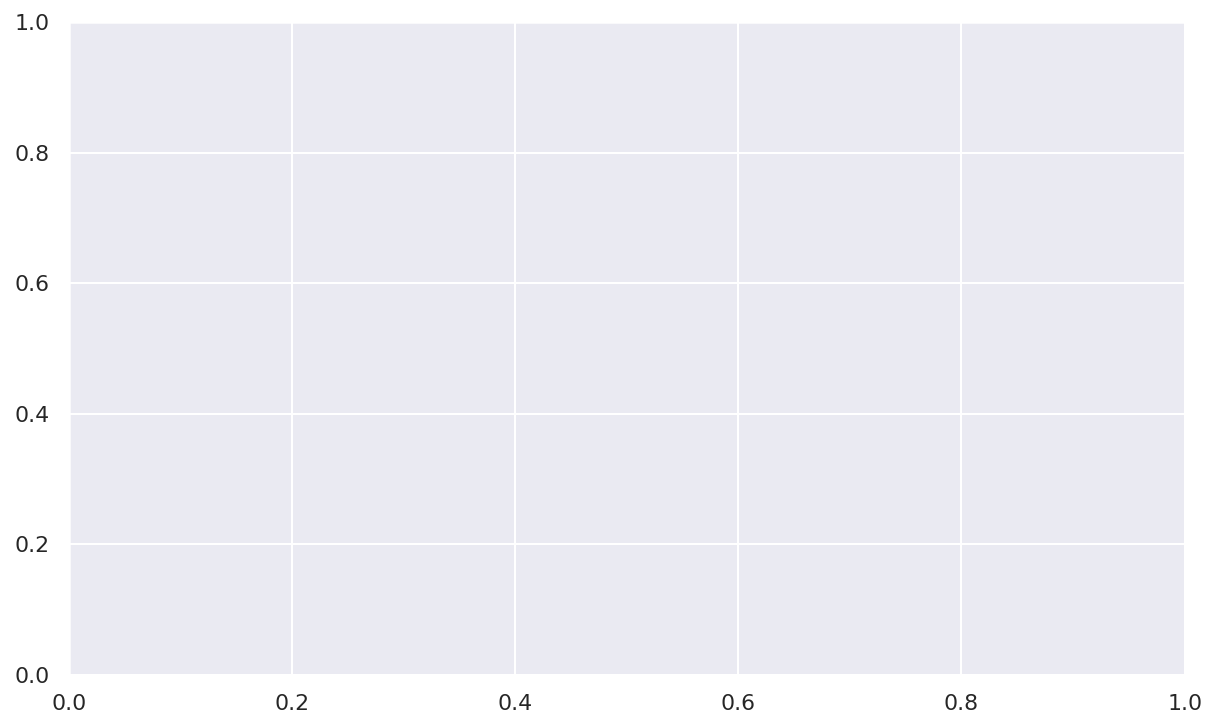

In [98]:
plt.figure( figsize=(10,6))
ax = sns.countplot( data=df_cbr, x=df_cbr.out02, hue=df_cbr.body_main_1)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, borderaxespad=0.2)
leg = ax.get_legend()
leg.set_title("body_main_1")
plt.grid()

In [ ]:
plt.figure( figsize=(10,6))
ax = sns.countplot( data=df_cbr, x=df_cbr.body_main_1, hue=df_cbr.out02)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, borderaxespad=0.2)
leg = ax.get_legend()
leg.set_title("out02")
plt.grid()

## Variables used for respective Global Similarity Functions

In [ ]:
must_var = ['id', 'caseID', 'similarity', 'patient_id']

kb_var = must_var + [
             'activity_1', 
             'age_1', 
             'bmi_1', 
             'body_main_1', 
             'como_count_1', 
             'education_1', 
             'employ_1', 
             'eq5d_care_1',     
             'eq5d_depr_1', 
             'eq5d_walk_1',
             'fear_1', 
             'gender_1', 
             'hscl_score_1',
             'mskhq_pa_1', 
             'mskhq_q7_1', 
             'mskt_risk_1',
             'oreb_q10_1', 
             'oreb_q7_1', 
             'pain_continuous_1',
             'pain_duration_1', 
             'pain_lweek_1', 
             'painsite_number_1',
             'pseq_1', 
             'qol15D_q14_vital_1', 
             'qol15D_q5_sleep_1',
             'smoking_1', 
             'walk_aid_1', 
             'work_ability_1',  
             'work_type_1',
             'out01', 
             'out02' 
            ]   

gsf_var = [kb_var] #, lca_var, msk_var, fdk_var, rk_var, rk_var]

In [ ]:
gsf_var[0];

In [ ]:
result = getSimInstances('patient9', global_sim_list[0], k=20, deci_precision=2)
# result[ lca_var].sort_values( ['similarity',  'seed_label'], ascending=False)

In [ ]:
# ax = sns.regplot(x="index", y="similarity", data=result.reset_index())

### Function for plotting similarity value and lca class for a query patient's retrieval, with respect of a GSF

In [ ]:
def scatter_plot_with_lca( df, x_val='index', y_val='similarity', title='', x_label='', y_label=''):
    
    color_dict = dict({'Class 5' : 'red',
                       'Class 4' : 'orange',
                       'Class 3' : 'brown',
                       'Class 2' : 'blue',
                       'Class 1' : 'green'})
    
    df = df.reset_index()

    plt.figure( figsize=(10,4))
    
    ax = sns.scatterplot(x=x_val, y=y_val,
                         hue='lca', 
                         hue_order=color_dict,
                         palette=color_dict,
                         size=y_val,
                         sizes=(50, 300),
                         legend='full',
                         data=df)
    
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, borderaxespad=0.2)
    
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)                              
                                   
    plt.grid( True)
    plt.xticks(np.arange(14), ('self', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'))
    ax.set_xlim([0,15])
    ax.set_ylim([0.4,1.0])
    plt.title(title,fontsize=15)
    plt.show()
    
    return ax

def query_n_retrieval_plot_with_lca(query_cid='patient0', gsf=global_sim_list[0]):

    title = 'Retrieval result for "'+ query_cid +'" with GSF : '+ gsf

    df_result = getSimInstances(query_cid, gsf, k=20, deci_precision=2)

    ax = scatter_plot_with_lca(df_result, 
                               x_val='index', y_val='similarity', 
                               title=title, 
                               x_label='k retrievals', 
                               y_label='similarity scores'
                              )
    return ax

### Testing the function : query_n_retrieval_plot_with_lca(...)

In [ ]:
# query_n_retrieval_plot_with_lca(query_cid='patient0', gsf=global_sim_list[1]);

### Function for plotting similarity value and label for a query patient's retrieval, with respect of a GSF

In [ ]:
def scatter_plot_with_size_n_label(df, x_val='index', y_val='similarity', title='', x_label='', y_label='', dot_labels='', x_tick_list_size=['1']):
    df = df.reset_index()
                                   
    cool_warm = sns.dark_palette("red", as_cmap=True)
                                   
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

    plt.figure( figsize=(10,4))
    
    ax = sns.scatterplot(x=x_val, y=y_val,
                         hue=y_val, 
                         size=y_val, # these are the column names from the given dataset
                         palette=cool_warm,
                         sizes=(50, 300), 
                         legend='full', # `legend` must be 'brief', 'full', or False
                         data=df)
    
    handles, labels = ax.get_legend_handles_labels()
    
    # reverse to keep order consistent
    ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, borderaxespad=0.2)  
    
    ax.legend_.set_title(y_val)
    
    # add annotations one by one with a loop
    if dot_labels is not '':
        for line in range(0, df.shape[0]):

            ax.text(
                df[x_val][line]+0.1, 
                df[y_val][line]+0.18, 
                df[dot_labels][line], 

                # Horizontal alignment must be one of ('center', 'right', 'left')
                horizontalalignment='left',

                # Vertical alignment must be one of ('top', 'bottom', 'center', 'baseline')
                verticalalignment='top', 

                # rotation of the text for each dot
                rotation=30,

                size='small', 
                color='grey', 
                weight='medium'
            )     
    
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)       
    
    list_str = list(map(str, np.arange(x_tick_list_size)))
    
    list_str[0] = 'self'   # adding to indicate the self case
                                   
    plt.grid( True)
    plt.xticks(np.arange(x_tick_list_size), (list_str))
    ax.set_xlim([-0.5,x_tick_list_size])
    ax.set_ylim([-0.1,1.1])
    plt.title(title,fontsize=15)
    plt.show()
                                   
    return ax

In [ ]:
def query_n_retrieval_plot_with_size_n_label(query_cid='patient0', sim_index=0, dot_labels='patient_id', k=5):

    gsf = global_sim_list[sim_index]
    
    gsf_var = [kb_var, lca_var, msk_var, fdk_var, rk_var, rk_var]
    sim_var = gsf_var[sim_index]
    
    title = 'Retrieval result for "'+ query_cid +'" with GSF : '+ gsf

    df_result = getSimInstances(query_cid, gsf, k=k, deci_precision=3)

    ax = scatter_plot_with_size_n_label(df_result, 
                               x_val='index', y_val='similarity', 
                               title=title, 
                               x_label='k retrievals', 
                               y_label='similarity scores', 
                               dot_labels=dot_labels,
                               x_tick_list_size = df_result.id.size
                            )
    
    df = df_result[sim_var]
    
    print('\n', 'Retrieved dataset for : ', query_cid, 'with GSF : ', gsf,' (including its similarity variables)', '\n')
    return df

### Testing the function : query_n_retrieval_plot_with_size_n_label( ... )

In [99]:
# query_n_retrieval_plot_with_size_n_label(query_cid='patient0', sim_index=1 );

## Determining the Seed Cases

In [100]:
# df_cbr.seed_label.sort_values()[:14]

In [101]:
seed_cases = [
    'patient1',    
    'patient2',  
    'patient3',  
    'patient4', 
    'patient5',
    'patient6',    
    'patient7',  
    'patient8',  
    'patient9'
]

## Query in the Eephemeral case base

In [102]:
def getSimInstancesFromEphemeralCB(case_id, sim_function, case_list=seed_cases, k=np.size(seed_cases), deci_precision=3):
    
    # curl -X POST "http://localhost:8080/concepts/patient/casebases/seed_casebase/amalgamationFunctions/LCA_variables/ephemeral/retrievalByIDWithContent?caseID=patient0&k=-1" -H "accept: application/json" -H "Content-Type: application/json" -d "[ \"patient10\", \"patient10\", \"patient5\"]"

    # http://localhost:8080/concepts/patient/casebases/seed_casebase/amalgamationFunctions/LCA_variables/ephemeral/retrievalByIDWithContent?caseID=patient0&k=-1
    
    if ( (k == 0) | (k <-1)):
        print("The retrival number 'k' is invalid !!!")
        print("\t Therefor an empty dataframe will be returned.")
        print("The supplied value of k is : ", k)
        
        return pd.DataFrame()
    
    else :
        path_ephemeral = '/ephemeral'
        path_concepts  = '/concepts/' 
        path_casebases = '/casebases/' 
        path_sim_function = '/amalgamationFunctions/'
        path_operation = '/retrievalByCaseIDWithContent?'
    
        sim_k_instances_url = param_base_url + path_ephemeral + path_concepts + default_concept_name + path_casebases + default_casebase_name + path_sim_function + sim_function + path_operation + param_case_id + case_id + param_k + (k).__str__()
        
        payload = case_list
        
        response = requests.post( url= sim_k_instances_url, json=payload)
        
        df = rest_response_to_dataframe(response)
        
        df.similarity = pd.to_numeric(df.similarity, errors='ignore')
        df.similarity = df.similarity.round( decimals=deci_precision)
        
        df = df.sort_values( by=sim_label, ascending=False)
    
        return df

In [103]:
getSimInstancesFromEphemeralCB( 'patient0', global_sim_list[0], ['patient4'])

,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,4,patient4,support10_7_1956,0.496,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN


In [104]:
def query_ephemeral_n_plot_with_size_n_label(query_cid='patient0', sim_index=0, dot_labels='mskt_risk_1', k=np.size(seed_cases)):

    gsf = global_sim_list[sim_index]
    
    #gsf_var = [kb_var, lca_var, msk_var, fdk_var, rk_var, rk_var]
    sim_var = column_list
    
    title = 'Retrieval result for "'+ query_cid +'" with GSF : '+ gsf
    
    query_case = getSimInstances( query_cid, gsf, k=1)

    df_retrieved = getSimInstancesFromEphemeralCB(query_cid, gsf, k=k, deci_precision=3)
    
    df_result = pd.concat([query_case, df_retrieved]).reset_index(drop = True) 

    ax = scatter_plot_with_size_n_label(df_result, 
                               x_val='index', y_val='similarity', 
                               title=title, 
                               x_label='k retrievals', 
                               y_label='similarity scores', 
                               dot_labels=dot_labels,
                               x_tick_list_size = df_result.id.size
                            )
    
    df = df_result[sim_var]
    
    print('\n', 'Retrieved dataset for : ', query_cid, 'with GSF : ', gsf,' (including its similarity variables)', '\n')
    return df

In [105]:
lca_kb_var = [
    'id',
    'caseID',
    'similarity',
    'seed_label',
    'lca',
    'activity_1',
    'age',
    'education',
    'eq5d_depr_1',
    'fear_1',
    'gender',
    'hscl10_mean_1', 
    'oreb_q10_1',
    'oreb_q7_1',
    'pain_continuous_1',
    'pain_duration_1',
    'pain_lweek_1',
    'painsite_1',
    'pseq_1',
    'sleep15D_1',
    'smoking',
    'vital15D_1',
    'work_ability_1'
]

In [106]:
def query_ephemeral_with_label(query_cid='patient0', sim_index=0, dot_labels='mskt_risk_1', k=np.size(seed_cases)):

    gsf = global_sim_list[sim_index]
    
    #gsf_var = [kb_var, lca_var, msk_var, fdk_var, rk_var, rk_var]
    #sim_var = lca_kb_var
    
    title = 'Retrieval result for "'+ query_cid +'" with GSF : '+ gsf
    
    query_case = getSimInstances( query_cid, gsf, k=1)

    df_retrieved = getSimInstancesFromEphemeralCB(query_cid, gsf, k=k, deci_precision=3)
    
    df_result = pd.concat([query_case, df_retrieved]).reset_index(drop = True) 

    ax = scatter_plot_with_size_n_label(df_result, 
                               x_val='index', y_val='similarity', 
                               title=title, 
                               x_label='k retrievals', 
                               y_label='similarity scores', 
                               dot_labels=dot_labels,
                               x_tick_list_size = df_result.id.size
                            )
    
    df = df_result[sim_var]
    
    print('\n', 'Retrieved dataset for : ', query_cid, 'with GSF : ', gsf,' (including its similarity variables)', '\n')
    return df

In [107]:
# query_ephemeral_n_plot_with_size_n_label(query_cid='patient0', sim_index=1 )

# --------------------------------------------------------------------------------------------------------------

# Experiment should be performed below this cell!

#### Parameters used for **query_n_retrieval_plot_with_size_n_label( ... )** :
- **query_cid**       : the patient's case base id, which is 'patient0', 'patient1', ..., 'patient13'
- **sim_index** : index value from the global_sim_list, which is shown as below:

 > **0** : knowledge_based
 
 > **1** : LCA_variables
 
 > **2** : MSK_tool_variables  
 
 > **3** : fredrik_initial_191004
 
 > **4** : dichotomous_rank_25
 
 > **5** : dichotomous_equal_25  

## Query in the Seed case base

### Query using stata parient id:

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient5&k=1


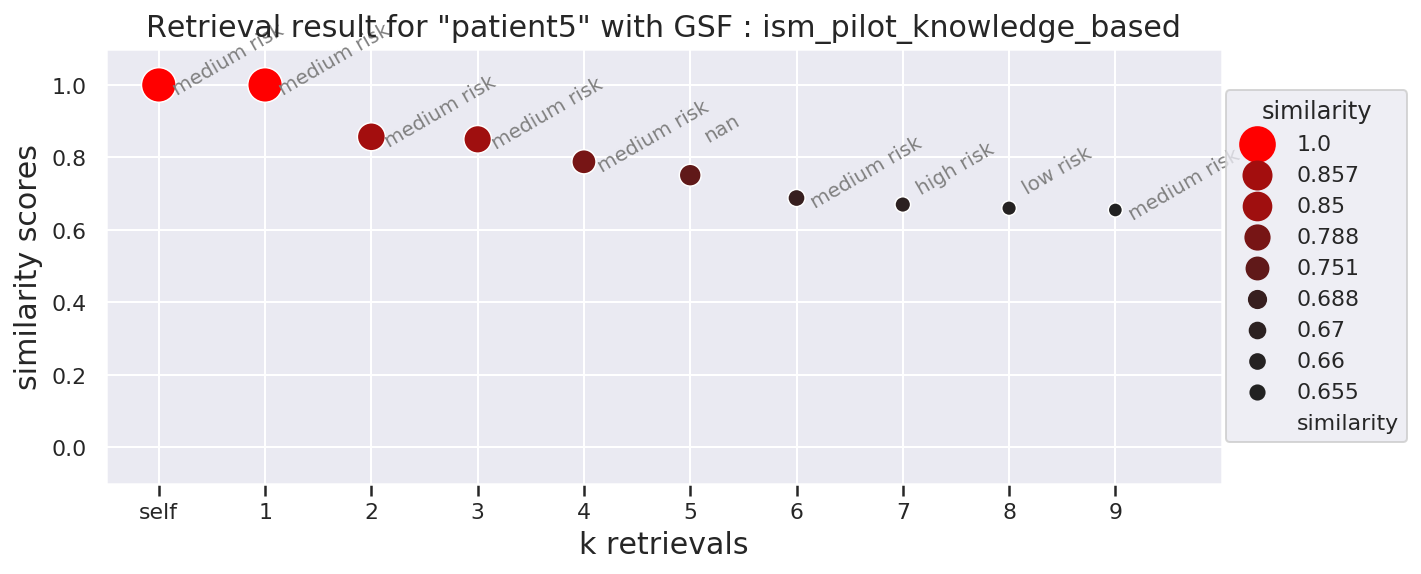


 Retrieved dataset for :  patient5 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,5,patient5,support10_8_1967,1.000,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
1,5,patient5,support10_8_1967,1.000,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
2,1,patient1,support10_2_1965,0.857,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
3,7,patient7,support10_10_1964,0.850,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
4,2,patient2,support10_5_1983,0.788,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
5,3,patient3,support10_6_1958,0.751,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
6,6,patient6,support10_9_1966,0.688,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
7,9,patient9,support10_12_1950,0.670,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN
8,8,patient8,support10_11_1966,0.660,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
9,4,patient4,support10_7_1956,0.655,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN


In [108]:
query_ephemeral_n_plot_with_size_n_label( query_cid=getCaseIDFromID(5), sim_index=0)

### Query using CBR patient id:

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient0&k=1


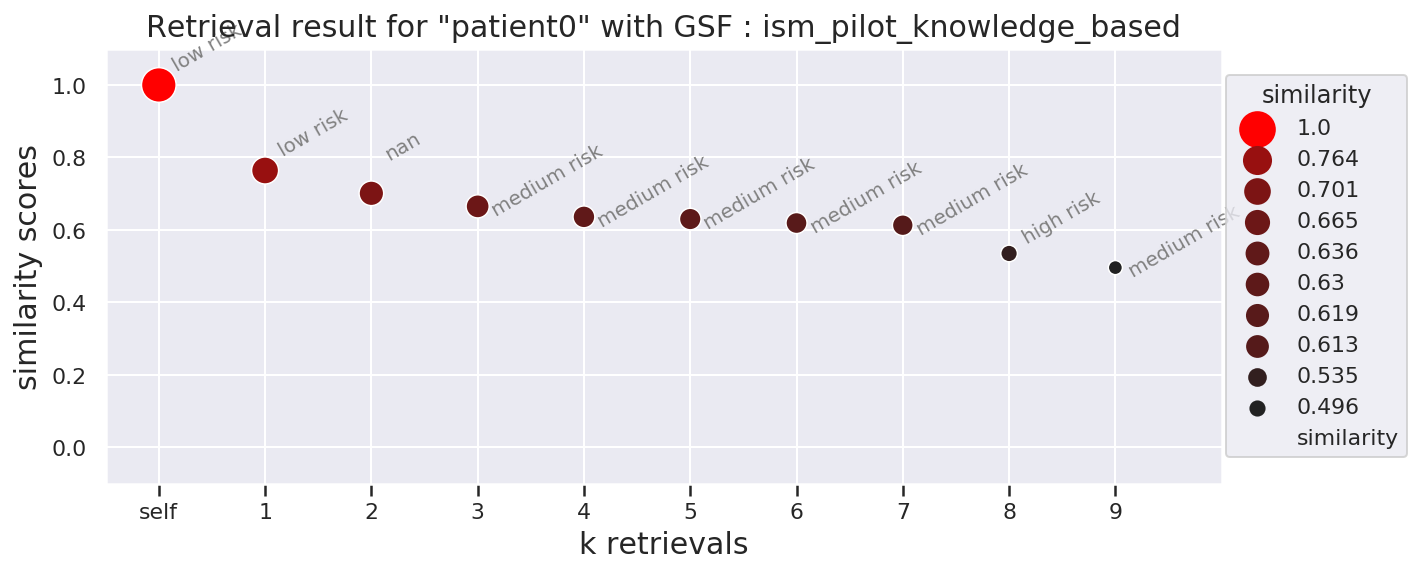


 Retrieved dataset for :  patient0 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,0,patient0,support10_1_1963,1.000,slightly reduced,57,24.77,neck,1 comorbidity,high school,working or other,no problem,not,no problem,8,female,1.1,2 days,moderately,low risk,4,2,yes,3 - 6m,5,2,NaN,healthy and energetic,slight problem,no,no walkaid,8,work demand much walking,0,NaN
1,8,patient8,support10_11_1966,0.764,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
2,3,patient3,support10_6_1958,0.701,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
3,5,patient5,support10_8_1967,0.665,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
4,1,patient1,support10_2_1965,0.636,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
5,2,patient2,support10_5_1983,0.630,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
6,7,patient7,support10_10_1964,0.619,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
7,6,patient6,support10_9_1966,0.613,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
8,9,patient9,support10_12_1950,0.535,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN
9,4,patient4,support10_7_1956,0.496,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN


In [109]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient0', sim_index=0)

In [110]:
show_sim( 1, sim_function=global_sim_list[0], columns=columns_for_analysis, k=2, deci_precision=5)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient1&k=3


,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,1,patient1,support10_2_1965,1,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,nan,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,nan
1,5,patient5,support10_8_1967,0.85667,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,nan,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,nan
2,7,patient7,support10_10_1964,0.84667,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,nan,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,nan


http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient1&k=1


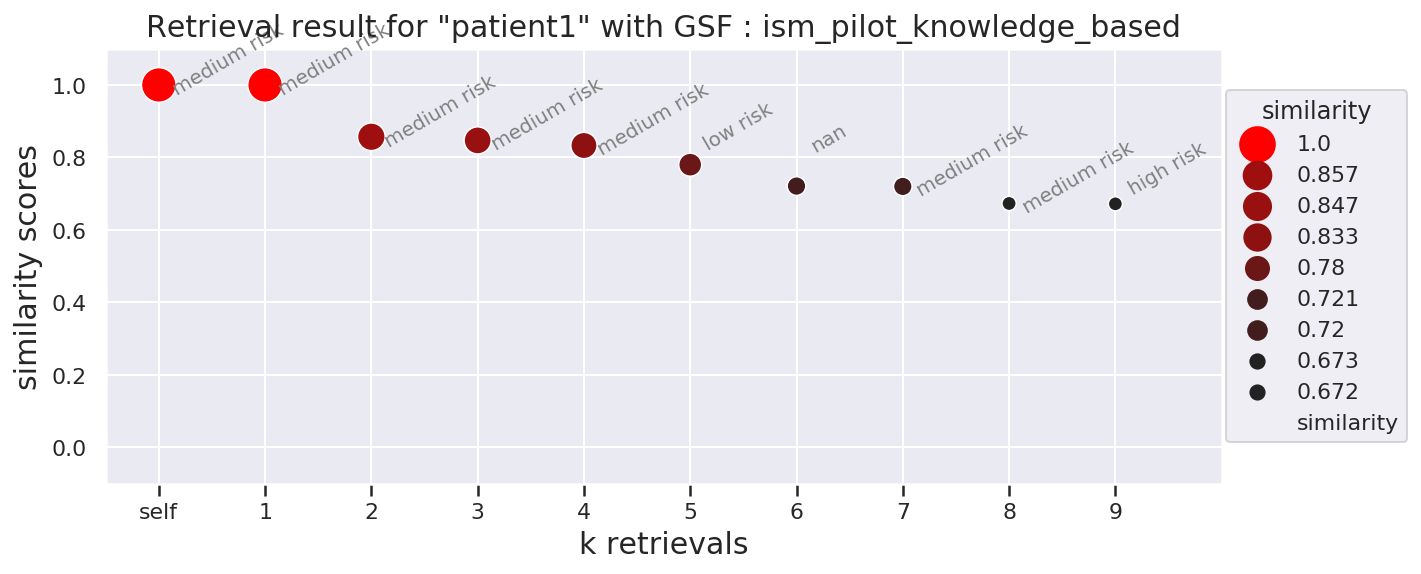


 Retrieved dataset for :  patient1 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,1,patient1,support10_2_1965,1.000,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
1,1,patient1,support10_2_1965,1.000,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
2,5,patient5,support10_8_1967,0.857,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
3,7,patient7,support10_10_1964,0.847,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
4,2,patient2,support10_5_1983,0.833,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
5,8,patient8,support10_11_1966,0.780,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
6,3,patient3,support10_6_1958,0.721,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
7,6,patient6,support10_9_1966,0.720,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
8,4,patient4,support10_7_1956,0.673,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN
9,9,patient9,support10_12_1950,0.672,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN


In [111]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient1', sim_index=0)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient2&k=1


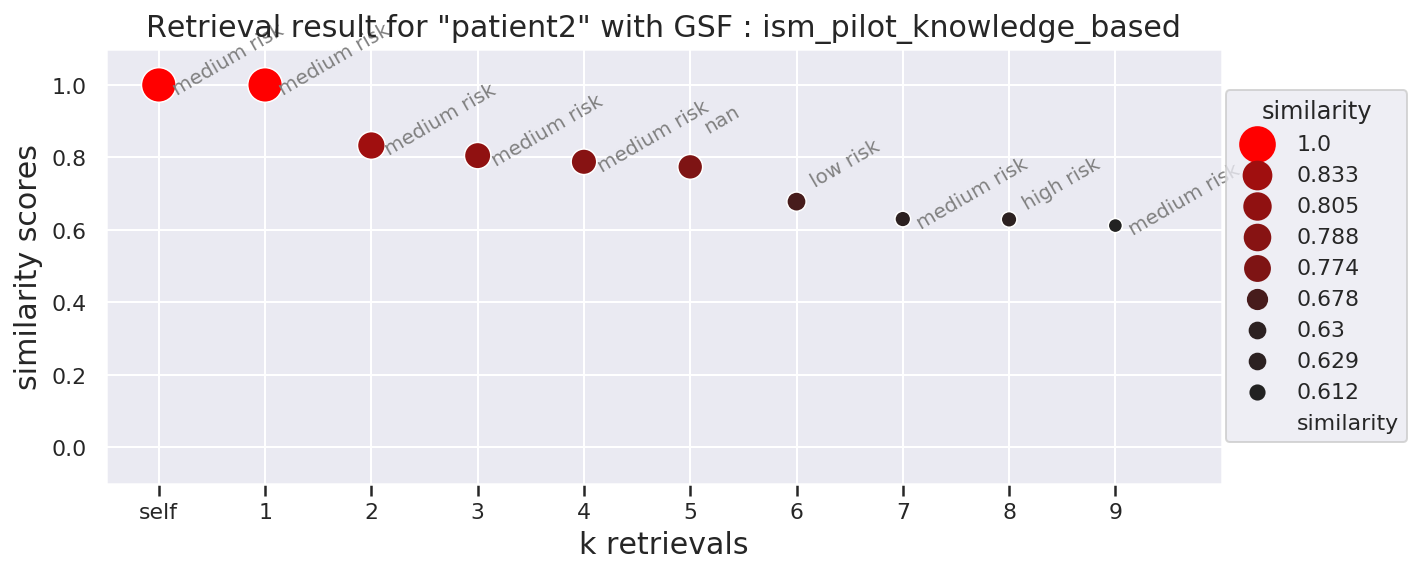


 Retrieved dataset for :  patient2 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,2,patient2,support10_5_1983,1.000,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
1,2,patient2,support10_5_1983,1.000,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
2,1,patient1,support10_2_1965,0.833,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
3,7,patient7,support10_10_1964,0.805,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
4,5,patient5,support10_8_1967,0.788,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
5,3,patient3,support10_6_1958,0.774,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
6,8,patient8,support10_11_1966,0.678,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
7,6,patient6,support10_9_1966,0.630,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
8,9,patient9,support10_12_1950,0.629,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN
9,4,patient4,support10_7_1956,0.612,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN


In [112]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient2', sim_index=0)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient3&k=1


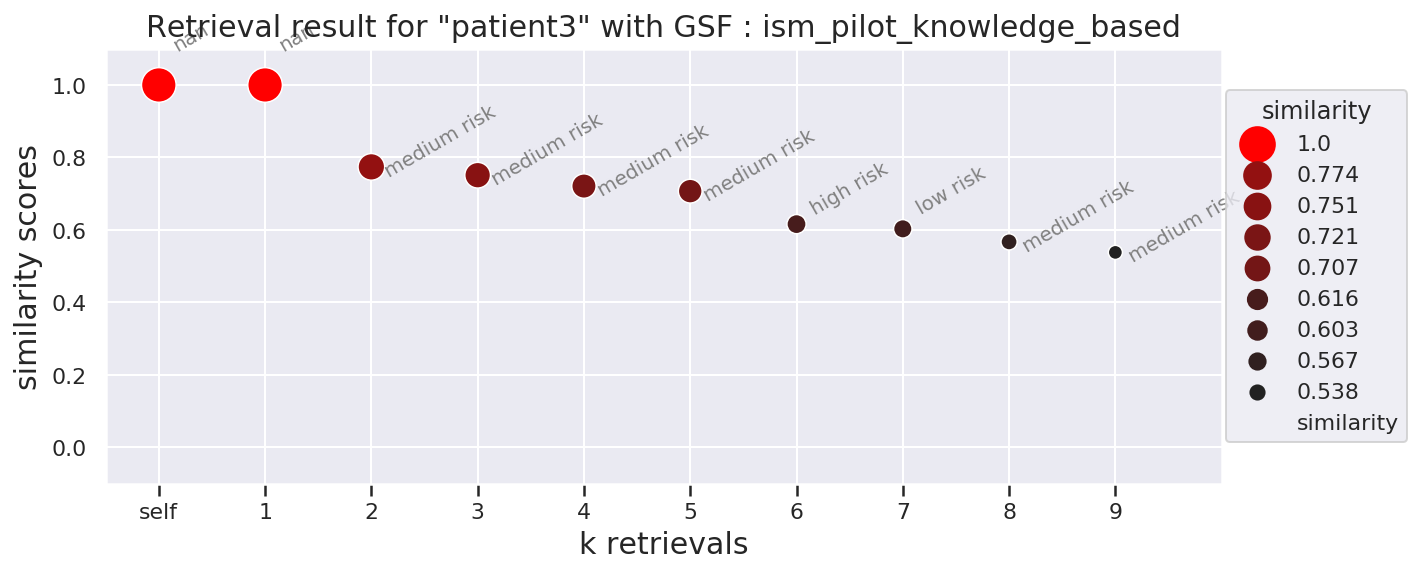


 Retrieved dataset for :  patient3 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,3,patient3,support10_6_1958,1.000,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
1,3,patient3,support10_6_1958,1.000,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
2,2,patient2,support10_5_1983,0.774,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
3,5,patient5,support10_8_1967,0.751,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
4,1,patient1,support10_2_1965,0.721,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
5,7,patient7,support10_10_1964,0.707,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
6,9,patient9,support10_12_1950,0.616,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN
7,8,patient8,support10_11_1966,0.603,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
8,6,patient6,support10_9_1966,0.567,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
9,4,patient4,support10_7_1956,0.538,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN


In [113]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient3', sim_index=0)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient4&k=1


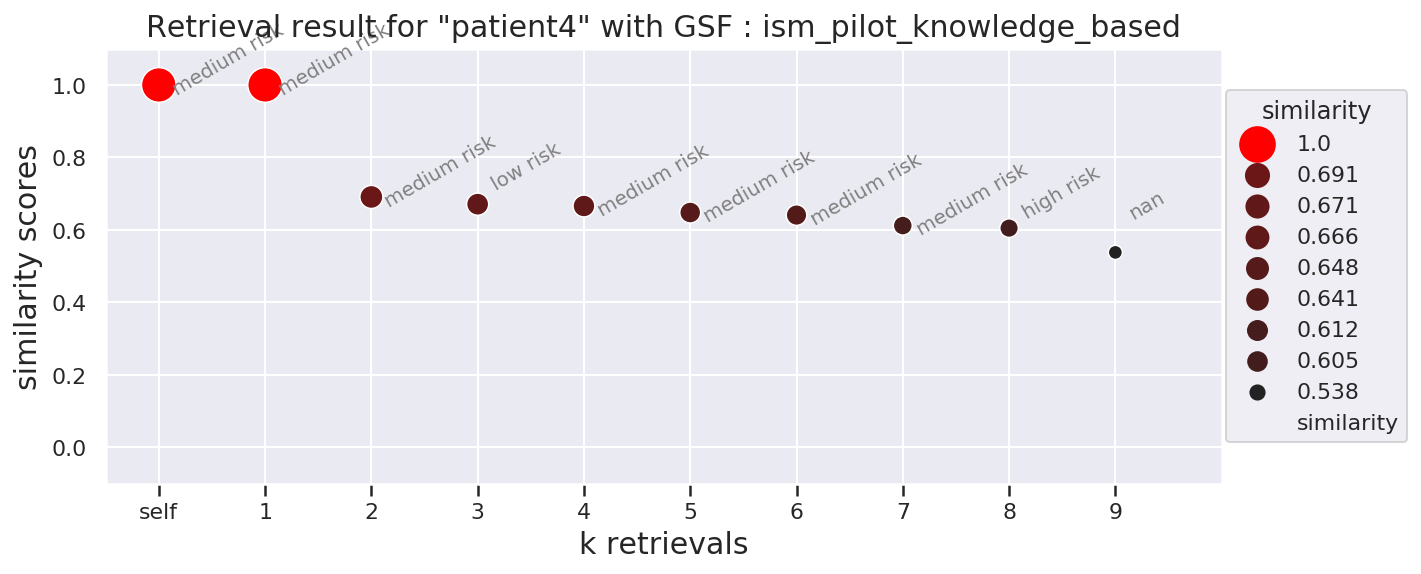


 Retrieved dataset for :  patient4 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,4,patient4,support10_7_1956,1.000,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN
1,4,patient4,support10_7_1956,1.000,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN
2,7,patient7,support10_10_1964,0.691,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
3,8,patient8,support10_11_1966,0.671,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
4,1,patient1,support10_2_1965,0.666,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
5,5,patient5,support10_8_1967,0.648,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
6,6,patient6,support10_9_1966,0.641,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
7,2,patient2,support10_5_1983,0.612,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
8,9,patient9,support10_12_1950,0.605,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN
9,3,patient3,support10_6_1958,0.538,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN


In [114]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient4', sim_index=0)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient5&k=1


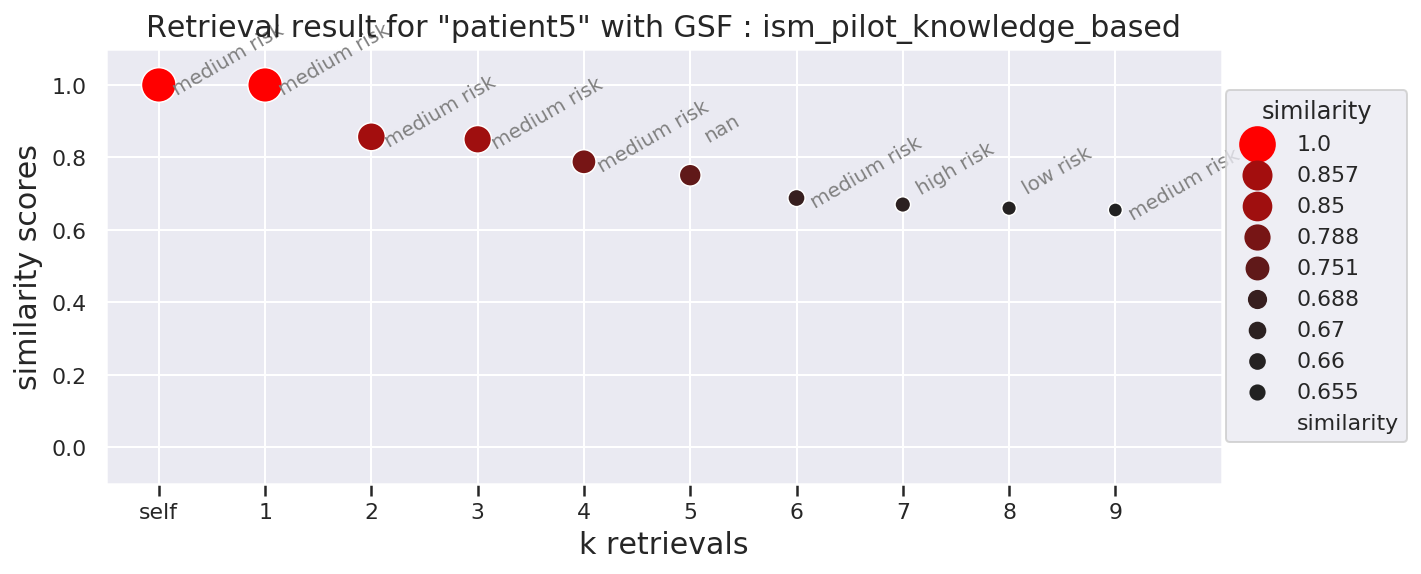


 Retrieved dataset for :  patient5 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,5,patient5,support10_8_1967,1.000,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
1,5,patient5,support10_8_1967,1.000,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
2,1,patient1,support10_2_1965,0.857,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
3,7,patient7,support10_10_1964,0.850,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
4,2,patient2,support10_5_1983,0.788,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
5,3,patient3,support10_6_1958,0.751,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
6,6,patient6,support10_9_1966,0.688,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
7,9,patient9,support10_12_1950,0.670,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN
8,8,patient8,support10_11_1966,0.660,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
9,4,patient4,support10_7_1956,0.655,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN


In [115]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient5', sim_index=0)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient6&k=1


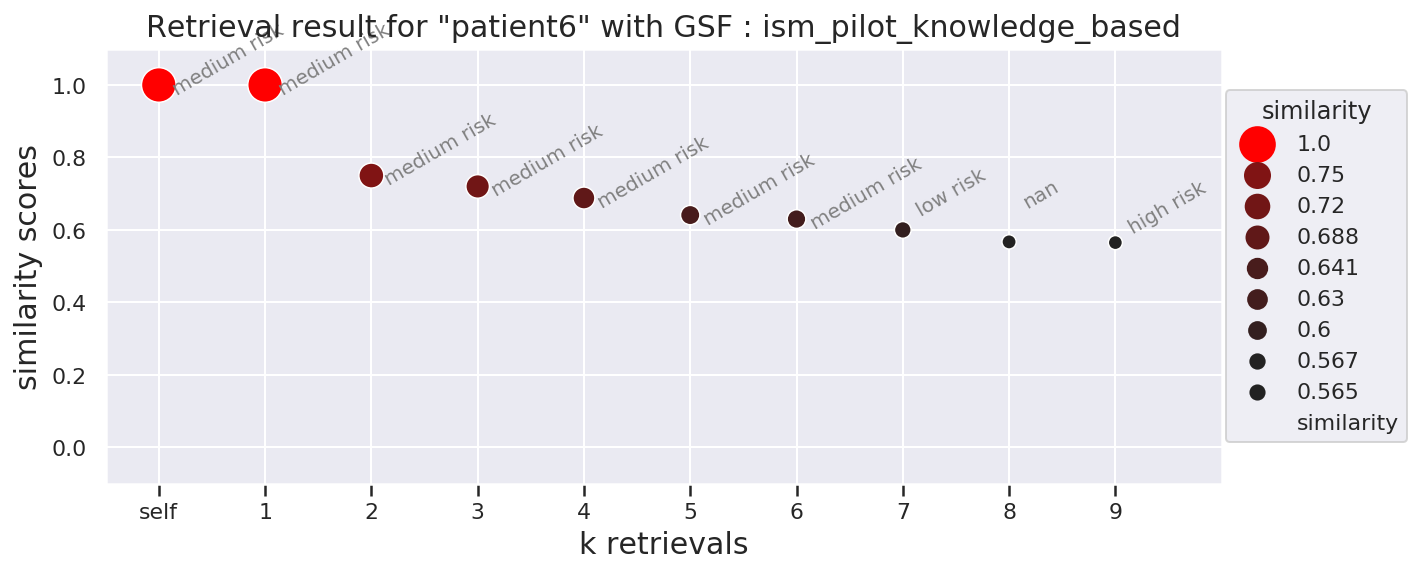


 Retrieved dataset for :  patient6 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,6,patient6,support10_9_1966,1.000,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
1,6,patient6,support10_9_1966,1.000,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
2,7,patient7,support10_10_1964,0.750,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
3,1,patient1,support10_2_1965,0.720,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
4,5,patient5,support10_8_1967,0.688,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
5,4,patient4,support10_7_1956,0.641,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN
6,2,patient2,support10_5_1983,0.630,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
7,8,patient8,support10_11_1966,0.600,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
8,3,patient3,support10_6_1958,0.567,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
9,9,patient9,support10_12_1950,0.565,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN


In [116]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient6', sim_index=0)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient7&k=1


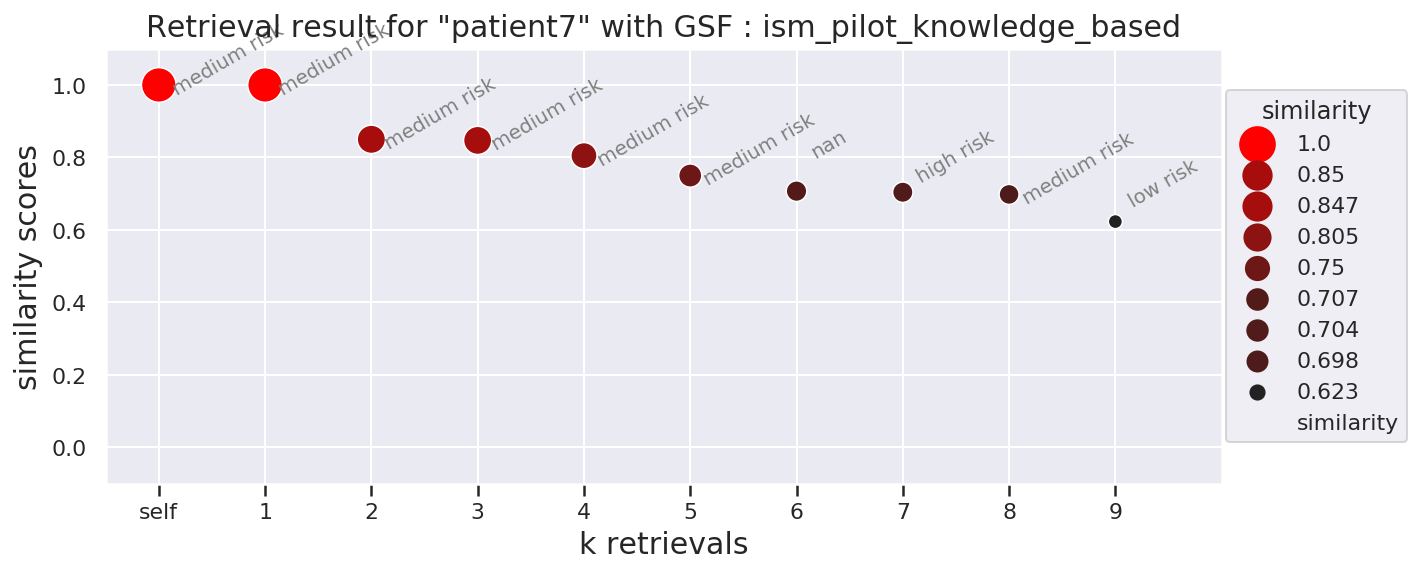


 Retrieved dataset for :  patient7 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,7,patient7,support10_10_1964,1.000,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
1,7,patient7,support10_10_1964,1.000,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
2,5,patient5,support10_8_1967,0.850,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
3,1,patient1,support10_2_1965,0.847,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
4,2,patient2,support10_5_1983,0.805,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
5,6,patient6,support10_9_1966,0.750,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
6,3,patient3,support10_6_1958,0.707,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
7,9,patient9,support10_12_1950,0.704,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN
8,4,patient4,support10_7_1956,0.698,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN
9,8,patient8,support10_11_1966,0.623,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN


In [117]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient7', sim_index=0)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient8&k=1


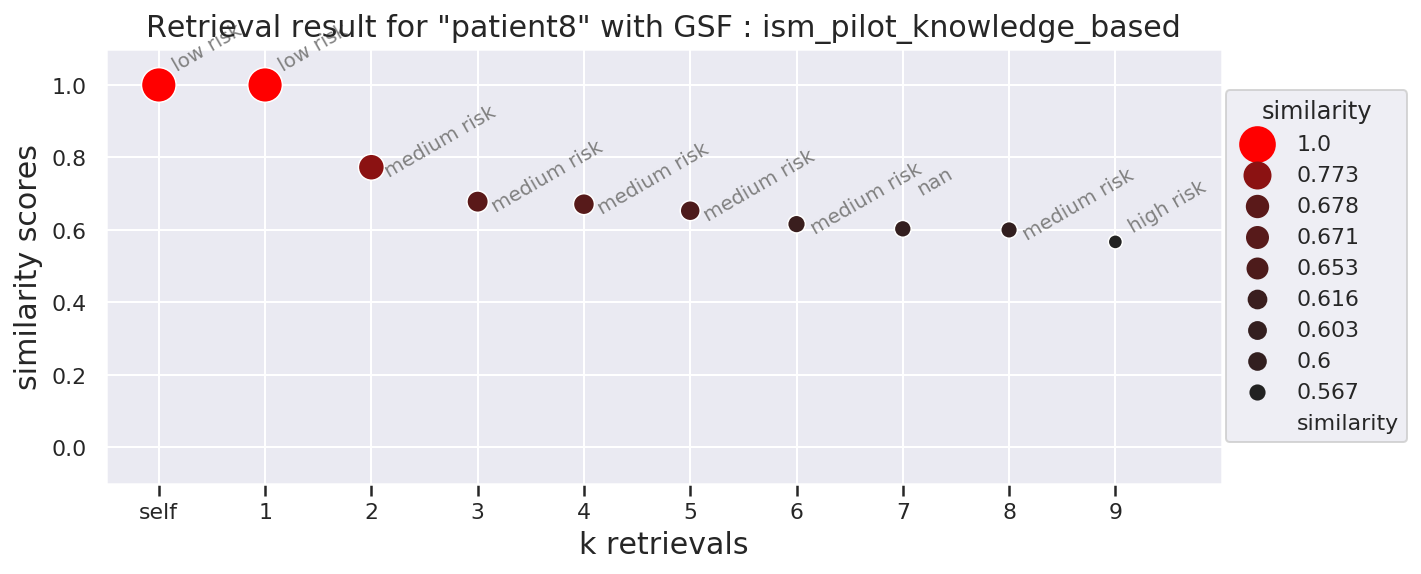


 Retrieved dataset for :  patient8 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,8,patient8,support10_11_1966,1.000,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
1,8,patient8,support10_11_1966,1.000,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
2,1,patient1,support10_2_1965,0.773,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
3,2,patient2,support10_5_1983,0.678,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
4,4,patient4,support10_7_1956,0.671,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN
5,5,patient5,support10_8_1967,0.653,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
6,7,patient7,support10_10_1964,0.616,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
7,3,patient3,support10_6_1958,0.603,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
8,6,patient6,support10_9_1966,0.600,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
9,9,patient9,support10_12_1950,0.567,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN


In [118]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient8', sim_index=0)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient9&k=1


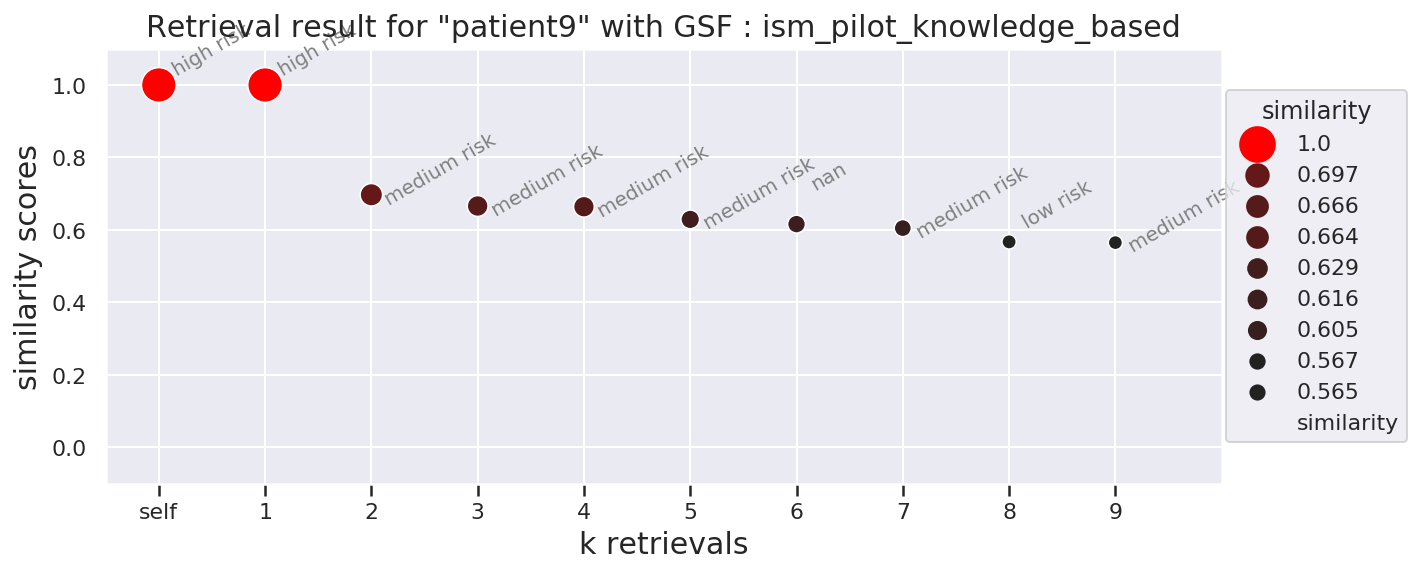


 Retrieved dataset for :  patient9 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,9,patient9,support10_12_1950,1.000,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN
1,9,patient9,support10_12_1950,1.000,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN
2,7,patient7,support10_10_1964,0.697,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
3,1,patient1,support10_2_1965,0.666,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
4,5,patient5,support10_8_1967,0.664,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
5,2,patient2,support10_5_1983,0.629,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
6,3,patient3,support10_6_1958,0.616,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
7,4,patient4,support10_7_1956,0.605,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN
8,8,patient8,support10_11_1966,0.567,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
9,6,patient6,support10_9_1966,0.565,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN


In [119]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient9', sim_index=0)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient8&k=1


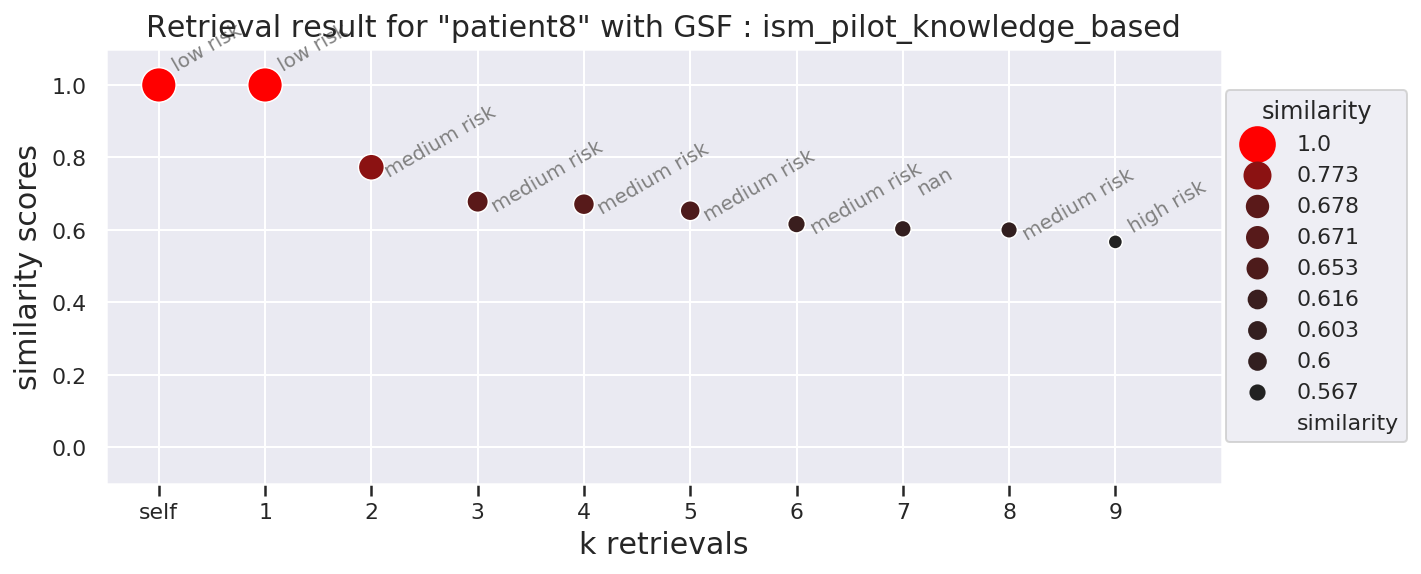


 Retrieved dataset for :  patient8 with GSF :  ism_pilot_knowledge_based  (including its similarity variables) 



,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,8,patient8,support10_11_1966,1.000,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
1,8,patient8,support10_11_1966,1.000,not reduced,54,25.71,neck,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,1.1,4 days,not at all,low risk,0,8,no,GT 12m,2,3,NaN,healthy and energetic,slight problem,no,no walkaid,9,mostly seated,0,NaN
2,1,patient1,support10_2_1965,0.773,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,NaN,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,NaN
3,2,patient2,support10_5_1983,0.678,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,NaN,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,NaN
4,4,patient4,support10_7_1956,0.671,quite reduced,64,27.43,back,2 - 3 comorbidities,high school,disability pension or work assessment,no problem,not,no problem,0,female,1.6,5 days,not at all,medium risk,0,10,no,GT 12m,4,3,NaN,slightly weary,sleep normally,no,no walkaid,3,NaN,0,NaN
5,5,patient5,support10_8_1967,0.653,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,NaN,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,NaN
6,7,patient7,support10_10_1964,0.616,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,NaN,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,NaN
7,3,patient3,support10_6_1958,0.603,slightly reduced,62,30.49,multisite_complex,1 comorbidity,primary school,working or other,no problem,slightly,no problem,0,female,1.9,2 days,not at all,NaN,2,3,yes,6 - 12m,7,2,NaN,slightly weary,slight problem,no,no walkaid,8,work demands much walking and lifting,1,NaN
8,6,patient6,support10_9_1966,0.600,quite reduced,54,36.52,hip,1 comorbidity,high school,working or other,no problem,slightly,slight problem,5,male,1.2,2 days,not at all,medium risk,5,10,yes,GT 12m,5,4,NaN,slightly weary,moderate problems,no,no walkaid,5,work demands much walking and lifting,0,NaN
9,9,patient9,support10_12_1950,0.567,quite reduced,70,17.58,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,slightly,no problem,1,female,1.6,5 days,slightly,high risk,2,6,yes,6 - 12m,7,8,NaN,moderately weary,moderate problems,yes,no walkaid,6,NaN,1,NaN


In [120]:
query_ephemeral_n_plot_with_size_n_label( query_cid='patient8', sim_index=0)

In [121]:
show_sim( 1, sim_function=global_sim_list[0], columns=columns_for_analysis, k=5, deci_precision=5)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based/retrievalByCaseIDWithContent?&caseID=patient1&k=6


,id,caseID,patient_id,similarity,activity_1,age_1,bmi_1,body_main_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,hscl_score_1,mskhq_pa_1,mskhq_q7_1,mskt_risk_1,oreb_q10_1,oreb_q7_1,pain_continuous_1,pain_duration_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,qol15D_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1,out01,out02
0,1,patient1,support10_2_1965,1,slightly reduced,55,26.57,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,0,female,1.3,3 days,not at all,medium risk,1,7,no,GT 12m,5,6,nan,healthy and energetic,moderate problems,no,no walkaid,8,work demand much walking,0,nan
1,5,patient5,support10_8_1967,0.85667,slightly reduced,53,27.1,multisite_complex,1 comorbidity,other,disability pension or work assessment,no problem,slightly,no problem,0,female,1.3,3 days,slightly,medium risk,3,5,yes,GT 12m,5,3,nan,moderately weary,moderate problems,no,no walkaid,6,work demand much walking,0,nan
2,7,patient7,support10_10_1964,0.84667,quite reduced,56,38.76,multisite_complex,1 comorbidity,high school,working or other,slight problem,not,moderate problems,2,female,1.5,3 days,not at all,medium risk,2,5,yes,GT 12m,6,5,nan,slightly weary,moderate problems,no,no walkaid,4,work demand much walking,0,nan
3,47,patient47,support5_31959_1969,0.83544,slightly reduced,51,37.44,multisite_complex,0 comorbidities,high school,working or other,no problem,not,moderate problems,7,male,1.0,3 days,slightly,medium risk,0,8,no,GT 12m,8,0,nan,healthy and energetic,sleep normally,no,no walkaid,8,work demand much walking,1,nan
4,2,patient2,support10_5_1983,0.833,slightly reduced,37,27.28,multisite_complex,1 comorbidity,high school,working or other,no problem,slightly,slight problem,4,female,1.9,none,not at all,medium risk,0,5,yes,GT 12m,6,5,nan,slightly weary,slight problem,no,no walkaid,8,mostly seated,1,nan
5,32,patient32,support31_32359_1979,0.79037,slightly reduced,41,22.68,neck,1 comorbidity,up to 4 years higher education,working or other,no problem,not,no problem,8,female,1.2,4 days,severely,medium risk,10,7,no,GT 12m,5,8,nan,slightly weary,slight problem,no,no walkaid,7,work demands much walking and lifting,1,nan


In [122]:
columns_for_analysis

['id',
 'caseID',
 'patient_id',
 'similarity',
 'activity_1',
 'age_1',
 'bmi_1',
 'body_main_1',
 'como_count_1',
 'education_1',
 'employ_1',
 'eq5d_care_1',
 'eq5d_depr_1',
 'eq5d_walk_1',
 'fear_1',
 'gender_1',
 'hscl_score_1',
 'mskhq_pa_1',
 'mskhq_q7_1',
 'mskt_risk_1',
 'oreb_q10_1',
 'oreb_q7_1',
 'pain_continuous_1',
 'pain_duration_1',
 'pain_lweek_1',
 'painsite_number_1',
 'pseq_1',
 'qol15D_q14_vital_1',
 'qol15D_q5_sleep_1',
 'smoking_1',
 'walk_aid_1',
 'work_ability_1',
 'work_type_1',
 'out01',
 'out02']

In [123]:
columns_for_analysis = ['id',
 'caseID',
 'patient_id',
 'similarity',
 'out01',
                        
  'body_main_1',
 'hscl_score_1',
 'oreb_q7_1',
 'pain_duration_1',
 'qol15D_q5_sleep_1',
  'work_ability_1',                       
 'mskt_risk_1',                        
  'walk_aid_1',                       
                        
 'activity_1',
 'age_1',
 'bmi_1',

 'como_count_1',
 'education_1',
 'employ_1',
 'eq5d_care_1',
 'eq5d_depr_1',
 'eq5d_walk_1',
 'fear_1',
 'gender_1',

 'mskhq_pa_1',
 'mskhq_q7_1',

 'oreb_q10_1',

 'pain_continuous_1',

 'pain_lweek_1',
 'painsite_number_1',
 'pseq_1',
 'qol15D_q14_vital_1',
 'smoking_1',


 'work_type_1',
 'out02']

In [131]:
global_sim_list = ['ism_pilot_knowledge_based_20201016','ism_pilot_knowledge_based']

In [138]:
# 39
show_sim( 27, sim_function=global_sim_list[0], columns=columns_for_analysis, k=65, deci_precision=5)

http://supportprim.idi.ntnu.no:8081/concepts/patient/casebases/cb_all/amalgamationFunctions/ism_pilot_knowledge_based_20201016/retrievalByCaseIDWithContent?&caseID=patient27&k=66


,id,caseID,patient_id,similarity,out01,body_main_1,hscl_score_1,oreb_q7_1,pain_duration_1,qol15D_q5_sleep_1,work_ability_1,mskt_risk_1,walk_aid_1,activity_1,age_1,bmi_1,como_count_1,education_1,employ_1,eq5d_care_1,eq5d_depr_1,eq5d_walk_1,fear_1,gender_1,mskhq_pa_1,mskhq_q7_1,oreb_q10_1,pain_continuous_1,pain_lweek_1,painsite_number_1,pseq_1,qol15D_q14_vital_1,smoking_1,work_type_1,out02
0,27,patient27,support27_1002_1990,1,0,knee,1.0,1,3 - 6m,sleep normally,10,low risk,no walkaid,not reduced,30,30.67,1 comorbidity,high school,working or other,no problem,not,no problem,0,male,none,not at all,5,no,1,1,nan,slightly weary,no,work demand much walking,nan
1,45,patient45,support5_31911_1995,0.78906,1,knee,1.1,6,1 - 3m,sleep normally,10,medium risk,no walkaid,quite reduced,25,32.0,0 comorbidities,high school,working or other,no problem,slightly,no problem,4,male,none,not at all,5,no,3,2,nan,healthy and energetic,no,nan,nan
2,17,patient17,support13_29310_2002,0.78,1,back,1.0,0,3 - 6m,sleep normally,10,low risk,no walkaid,not reduced,18,17.96,0 comorbidities,primary school,working or other,no problem,not,no problem,2,female,7 days,not at all,0,no,6,1,nan,healthy and energetic,no,nan,nan
3,38,patient38,support4_39178_1999,0.76344,0,back,1.2,7,GT 12m,sleep normally,8,low risk,no walkaid,not reduced,21,20.16,0 comorbidities,high school,working or other,no problem,not,no problem,2,male,none,not at all,0,no,1,1,nan,slightly weary,no,work demand much walking,nan
4,0,patient0,support10_1_1963,0.75312,0,neck,1.1,2,3 - 6m,slight problem,8,low risk,no walkaid,slightly reduced,57,24.77,1 comorbidity,high school,working or other,no problem,not,no problem,8,female,2 days,moderately,4,yes,5,2,nan,healthy and energetic,no,work demand much walking,nan
5,18,patient18,support13_31894_1956,0.75,1,hip,1.1,1,1 - 3m,slight problem,10,low risk,no walkaid,not reduced,64,21.48,0 comorbidities,more than 4 years higher education,working or other,no problem,not,slight problem,0,female,7 days,not at all,2,no,3,3,nan,healthy and energetic,no,mostly seated,nan
6,16,patient16,support12_32035_1969,0.74125,1,neck,1.0,0,LT 1 m,sleep normally,10,low risk,no walkaid,not reduced,51,27.47,0 comorbidities,more than 4 years higher education,working or other,no problem,not,nan,0,male,3 days,not at all,1,yes,6,1,nan,slightly weary,no,mostly seated,nan
7,22,patient22,support19_5191_1968,0.7335,1,shoulder,1.1,5,1 - 3m,slight problem,10,low risk,no walkaid,slightly reduced,52,26.59,0 comorbidities,more than 4 years higher education,working or other,no problem,not,no problem,1,male,2 days,not at all,0,no,2,2,nan,healthy and energetic,no,mostly seated,nan
8,13,patient13,support12_31903_1972,0.7315,0,shoulder,1.1,10,6 - 12m,moderate problems,9,low risk,no walkaid,not reduced,48,28.95,0 comorbidities,more than 4 years higher education,working or other,no problem,not,no problem,0,male,1 day,not at all,4,no,5,1,nan,slightly weary,no,mostly seated,nan
9,8,patient8,support10_11_1966,0.70719,0,neck,1.1,8,GT 12m,slight problem,9,low risk,no walkaid,not reduced,54,25.71,1 comorbidity,high school,working or other,no problem,not,no problem,0,female,4 days,not at all,0,no,2,3,nan,healthy and energetic,no,mostly seated,nan
